In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.



# Dataset1

In [ ]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()

#d1.shape

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


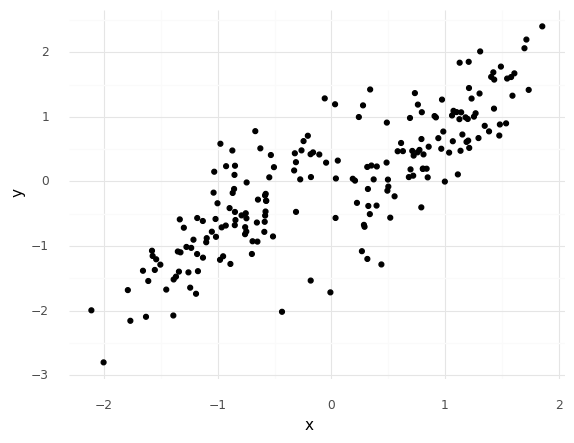

<ggplot: (8775637082265)>

In [ ]:
z = StandardScaler()
d1[["x","y"]] = z.fit_transform(d1)

ggplot(d1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

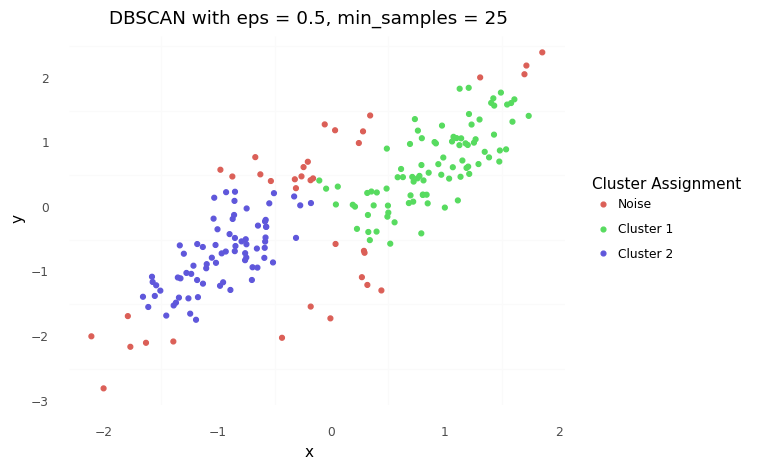

<ggplot: (8775636917713)>

In [ ]:
# dbscan and plot

db1 = DBSCAN(eps = 0.5, min_samples = 25).fit(d1)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

d1["assignments"] = db1.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))



In [ ]:
# grab only clustered data points
d1_clustered = d1.loc[(d1.assignments >= 0)]

silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

0.6169609560667532

In [ ]:
# overall 
silhouette_score(d1[["x","y"]], d1["assignments"])

0.39760284702143056

## Kmeans

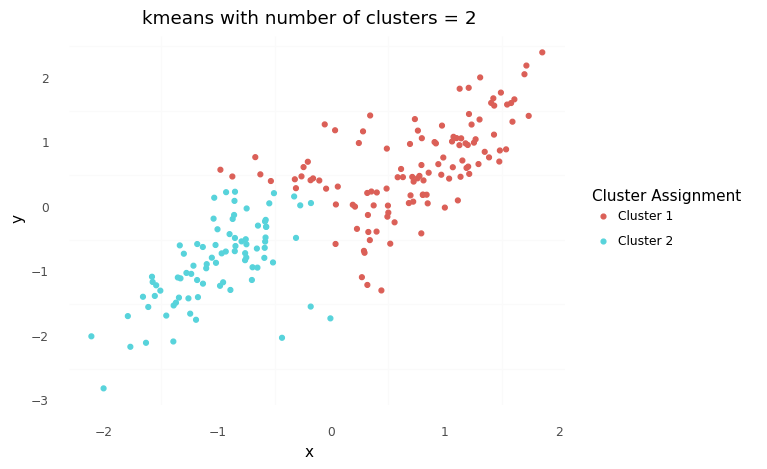

<ggplot: (8775636922141)>

In [ ]:
k=2 
db1_kmeans=KMeans(n_clusters=k).fit(d1)
labsList = labsList =  ["Cluster " + str(i) for i in range(1,len(set(db1_kmeans.labels_))+1)]

d1["assignments"] = db1_kmeans.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 2"))

## ELbow Method

Text(0, 0.5, 'Distortion')

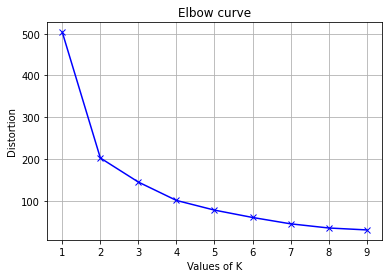

In [ ]:
SSE = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d1)
    SSE.append(kmeans.inertia_)

fig = plt.figure()
plt.plot(range(1, 10), SSE,'bx-')
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Values of K')
plt.ylabel('Distortion')

## Silhouette Score for kmeans

In [ ]:
score=silhouette_score(d1[['x','y']], d1["assignments"])
print("Silhouetter Score for  Kmeans",score)

Silhouetter Score for  Kmeans 0.39760284702143056


## Hierarchical 

In [ ]:
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(d1)
score = silhouette_score(d1, clustering.labels_, metric='euclidean')
print("Hirerical clustering of ward " ,score)
print('#------------------------------------')
print("\n")

clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single').fit(d1)
score = silhouette_score(d1, clustering.labels_, metric='euclidean')
print("Hirerical clustering of single " ,score)
print('#------------------------------------')
print("\n\n")

clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(d1)
score = silhouette_score(d1, clustering.labels_, metric='euclidean')
print("Hirerical clustering of complete " ,score)
print('#------------------------------------')
print("\n\n")



Hirerical clustering of ward  0.530672395720387
#------------------------------------


Hirerical clustering of single  0.5118063226290854
#------------------------------------



Hirerical clustering of complete  0.530672395720387
#------------------------------------





## GaussianMixture

In [ ]:
gm = GaussianMixture(2).fit(d1)
d1["assignments"] = gm.predict(d1)

score = silhouette_score(d1[["x","y"]],d1["assignments"])
print(score )

0.42684578031601406


# Dataset 2

In [ ]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")



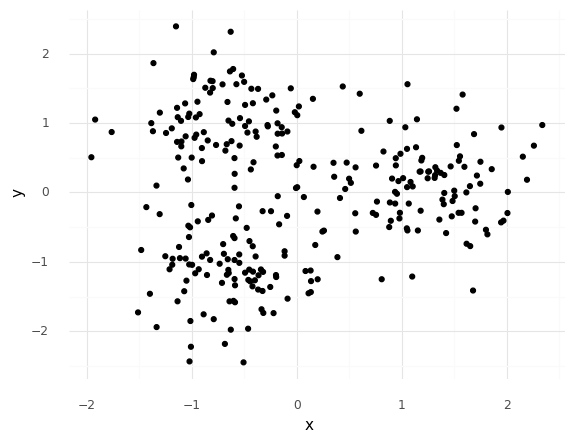

<ggplot: (8775637051885)>

In [ ]:
z = StandardScaler()
d2[["x","y"]] = z.fit_transform(d2)

ggplot(d2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

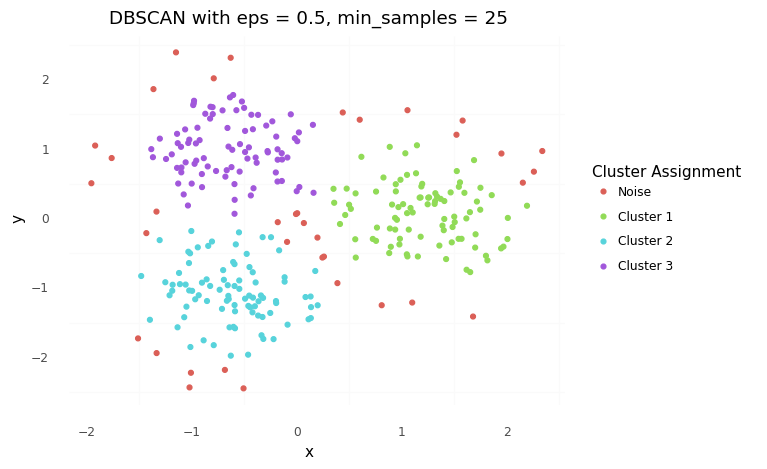

<ggplot: (8775628783097)>

In [ ]:
db2 = DBSCAN(eps = 0.5, min_samples = 25).fit(d2)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

d2["assignments"] = db2.labels_
(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [ ]:
# grab only clustered data points
d2_clustered = d2.loc[(d2.assignments >= 0)]

print(silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"]))
# overall 
print(silhouette_score(d2[["x","y"]], d2["assignments"]))

0.6140043544818719
0.4803831307840633


## Kmeans

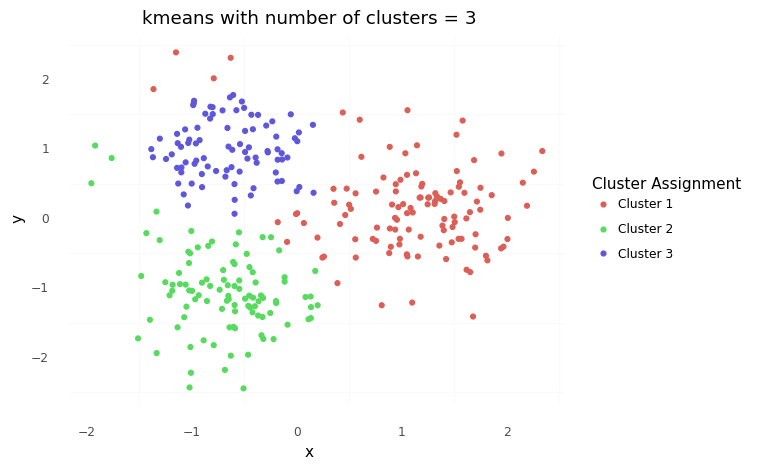

<ggplot: (8775628784833)>

In [ ]:
k=3
db2_kmeans=KMeans(n_clusters=k).fit(d2)
labsList = labsList =  ["Cluster " + str(i) for i in range(1,len(set(db2_kmeans.labels_))+1)]

d2["assignments"] = db2_kmeans.labels_

(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 3"))

## ELbow Method

Text(0, 0.5, 'Distortion')

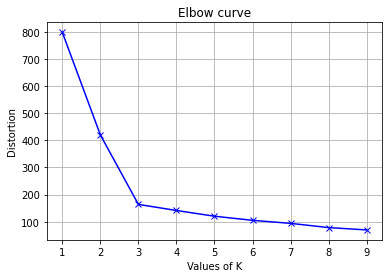

In [ ]:
SSE = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d2)
    SSE.append(kmeans.inertia_)

fig = plt.figure()
plt.plot(range(1, 10), SSE,'bx-')
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Values of K')
plt.ylabel('Distortion')

In [ ]:
# Silhouette Score for kmeans

score=silhouette_score(d2[['x','y']], d2["assignments"])
print("Silhouetter Score for  Kmeans",score)

Silhouetter Score for  Kmeans 0.5078162539673805


In [ ]:
# Hierarchical
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(d2)
score = silhouette_score(d2, clustering.labels_, metric='euclidean')
print("Hirerical clustering of ward " ,score)
print('#------------------------------------')
print("\n")

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(d2)
score = silhouette_score(d2, clustering.labels_, metric='euclidean')
print("Hirerical clustering of single " ,score)
print('#------------------------------------')
print("\n\n")

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(d2)
score = silhouette_score(d2, clustering.labels_, metric='euclidean')
print("Hirerical clustering of complete " ,score)
print('#------------------------------------')

Hirerical clustering of ward  0.6134760364610168
#------------------------------------


Hirerical clustering of single  0.434924592837131
#------------------------------------



Hirerical clustering of complete  0.6134760364610168
#------------------------------------


In [ ]:
# GaussianMixture
gm = GaussianMixture(3).fit(d2)
d2["assignments"] = gm.predict(d2)

score = silhouette_score(d1[["x","y"]],d1["assignments"])
print(score )

0.42684578031601406


# Dataset 3

In [ ]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")



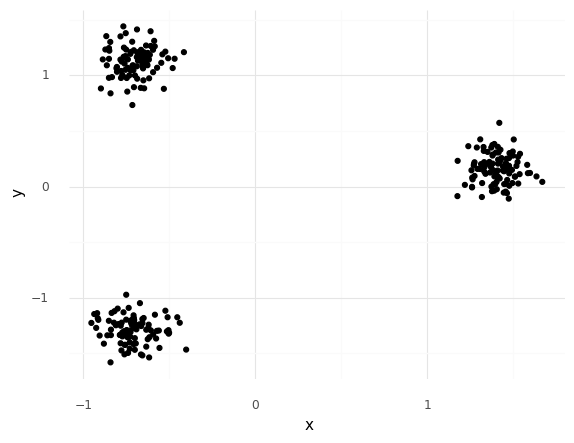

<ggplot: (8775636607585)>

In [ ]:
z = StandardScaler()
d3[["x","y"]] = z.fit_transform(d3)

ggplot(d3, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

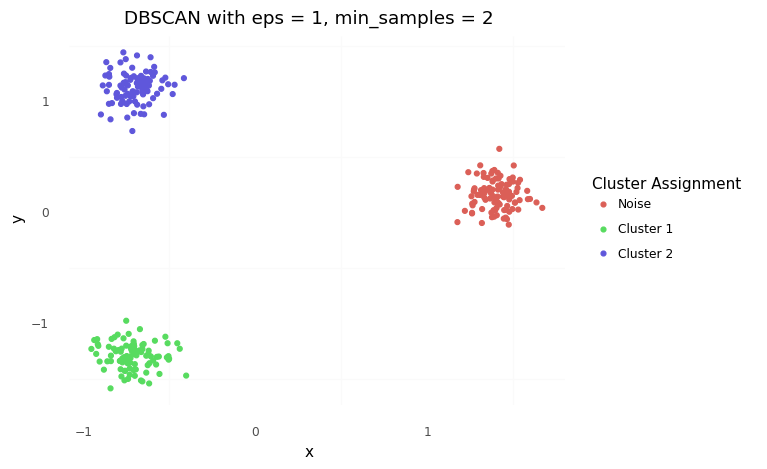

<ggplot: (8775636996109)>

In [ ]:
db3 = DBSCAN(eps = 1, min_samples = 2).fit(d3)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

d3["assignments"] = db3.labels_

(ggplot(d3, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1, min_samples = 2"))

In [ ]:
# grab only clustered data points
d3_clustered = d3.loc[(d3.assignments >= 0)]

print(silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"]))
# overall 
print(silhouette_score(d3[["x","y"]], d3["assignments"]))

0.913619050733588
0.913619050733588


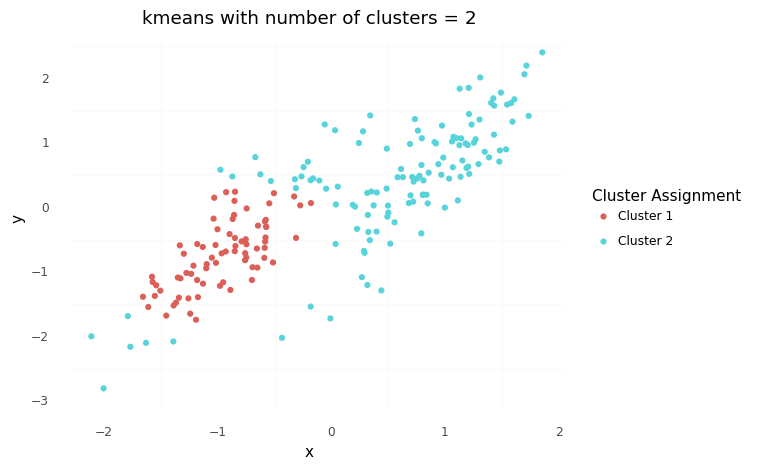

<ggplot: (8775626633857)>

In [ ]:
# Kmeans
k=2 
db3_kmeans=KMeans(n_clusters=k).fit(d3)
labsList = labsList =  ["Cluster " + str(i) for i in range(1,len(set(db1_kmeans.labels_))+1)]

d3["assignments"] = db3_kmeans.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 2"))

Text(0, 0.5, 'Distortion')

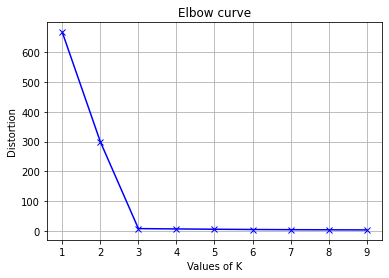

In [ ]:
# Elbow method
SSE = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d3)
    SSE.append(kmeans.inertia_)

fig = plt.figure()
plt.plot(range(1, 10), SSE,'bx-')
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Values of K')
plt.ylabel('Distortion')

In [ ]:
# Silhouette Score for kmeans

score=silhouette_score(d3[['x','y']], d3["assignments"])
print("Silhouetter Score for  Kmeans",score)

Silhouetter Score for  Kmeans 0.6123607755775542


In [ ]:
# Hierarchical
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(d3)
score = silhouette_score(d3, clustering.labels_, metric='euclidean')
print("Hirerical clustering of ward " ,score)
print('#------------------------------------')
print("\n")

clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single').fit(d3)
score = silhouette_score(d3, clustering.labels_, metric='euclidean')
print("Hirerical clustering of single " ,score)
print('#------------------------------------')
print("\n\n")

clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(d3)
score = silhouette_score(d3 ,clustering.labels_, metric='euclidean')
print("Hirerical clustering of complete " ,score)
print('#------------------------------------')

Hirerical clustering of ward  0.6416952480429244
#------------------------------------


Hirerical clustering of single  0.6416952480429244
#------------------------------------



Hirerical clustering of complete  0.6416952480429244
#------------------------------------


In [ ]:
# GaussianMixture
gm = GaussianMixture(2).fit(d3)
d3["assignments"] = gm.predict(d3)

score = silhouette_score(d3[["x","y"]],d3["assignments"])
print(score )

0.6123607755775542


# Dataset 4

In [ ]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")


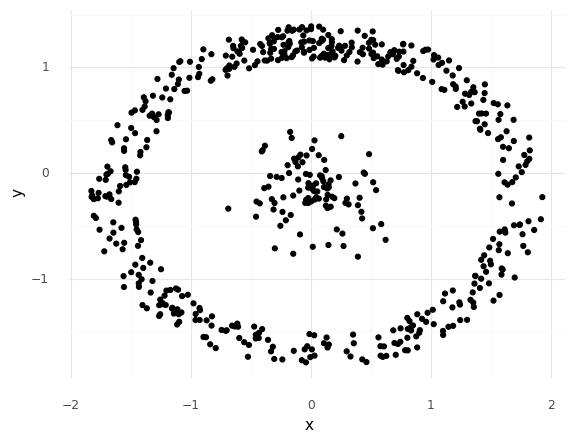

<ggplot: (8775626525121)>

In [ ]:
z = StandardScaler()
d4[["x","y"]] = z.fit_transform(d4)

ggplot(d4, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

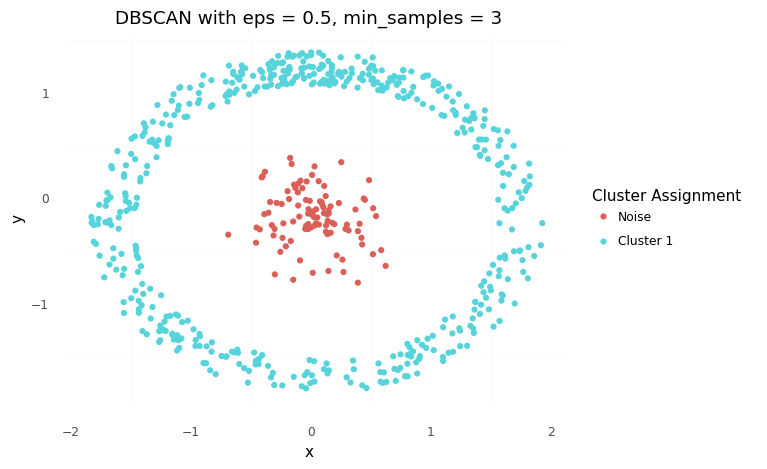

<ggplot: (8775626457901)>

In [ ]:
db4 = DBSCAN(eps = 0.5, min_samples = 3).fit(d4)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db4.labels_)))]

d4["assignments"] = db4.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 3"))

In [ ]:
# grab only clustered data points
d4_clustered = d4.loc[(d4.assignments >= 0)]

print(silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"]))
# overall 
print(silhouette_score(d4[["x","y"]], d4["assignments"]))

-0.042911477754913246
-0.042911477754913246


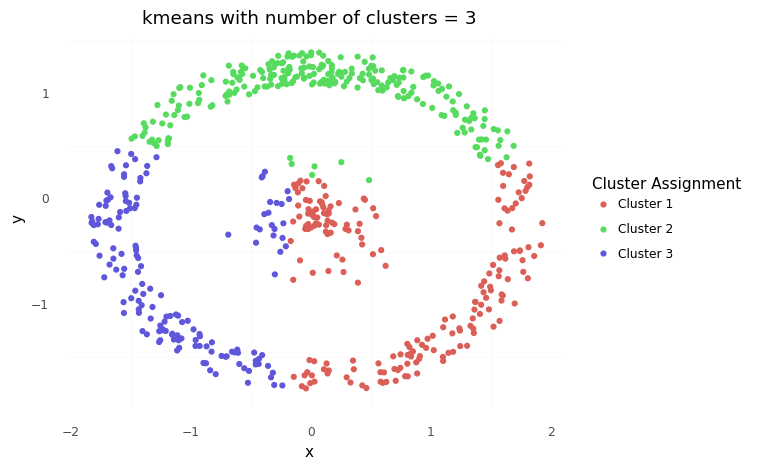

<ggplot: (8775626514909)>

In [ ]:
# Kmeans
k=3
db4_kmeans=KMeans(n_clusters=k).fit(d4)

labsList =  ["Cluster " + str(i) for i in range(1,len(set(db4_kmeans.labels_))+1)]

d4["assignments"] = db4_kmeans.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 3"))

Text(0, 0.5, 'Distortion')

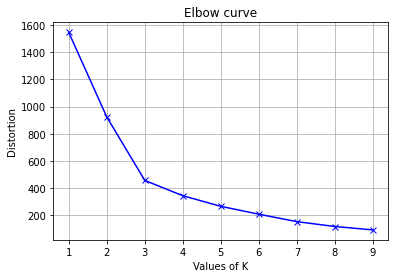

In [ ]:
# Elbow method
SSE = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d4)
    SSE.append(kmeans.inertia_)

fig = plt.figure()
plt.plot(range(1, 10), SSE,'bx-')
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Values of K')
plt.ylabel('Distortion')

In [ ]:
# Silhouette Score for kmeans

score=silhouette_score(d4[['x','y']], d4["assignments"])
print("Silhouetter Score for  Kmeans = ",score)

Silhouetter Score for  Kmeans=  0.41190613927002284


In [ ]:
# Hierarchical
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(d4)
score = silhouette_score(d4, clustering.labels_, metric='euclidean')
print("Hirerical clustering of ward " ,score)
print('#------------------------------------')
print("\n")

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(d4)
score = silhouette_score(d4, clustering.labels_, metric='euclidean')
print("Hirerical clustering of single " ,score)
print('#------------------------------------')
print("\n\n")

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(d4)
score = silhouette_score(d4 ,clustering.labels_, metric='euclidean')
print("Hirerical clustering of complete " ,score)
print('#------------------------------------')

Hirerical clustering of ward  0.5209881403255381
#------------------------------------


Hirerical clustering of single  0.5209881403255381
#------------------------------------



Hirerical clustering of complete  0.34712183482469455
#------------------------------------


In [ ]:
# GaussianMixture
gm = GaussianMixture(3).fit(d4)
d4["assignments"] = gm.predict(d4)

score = silhouette_score(d4[["x","y"]],d4["assignments"])
print(score )

0.41190613927002284


### Compare

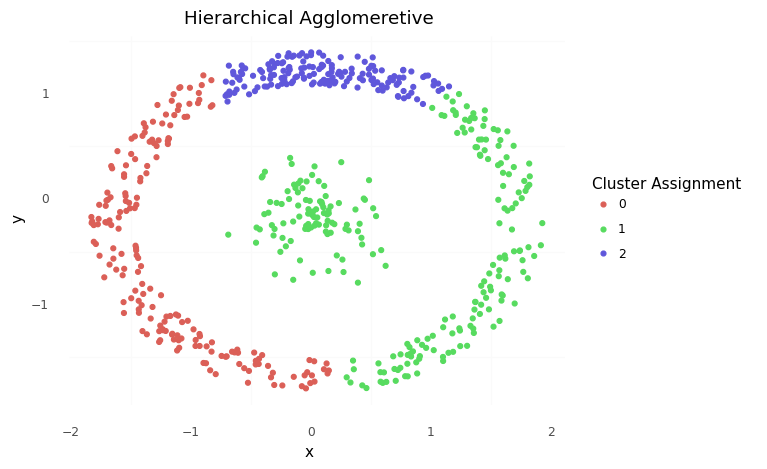

<ggplot: (8775631267821)>


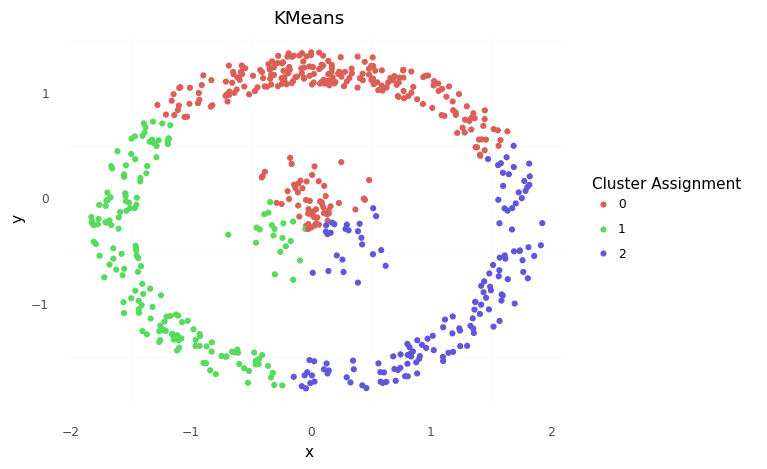

<ggplot: (8775624692649)>


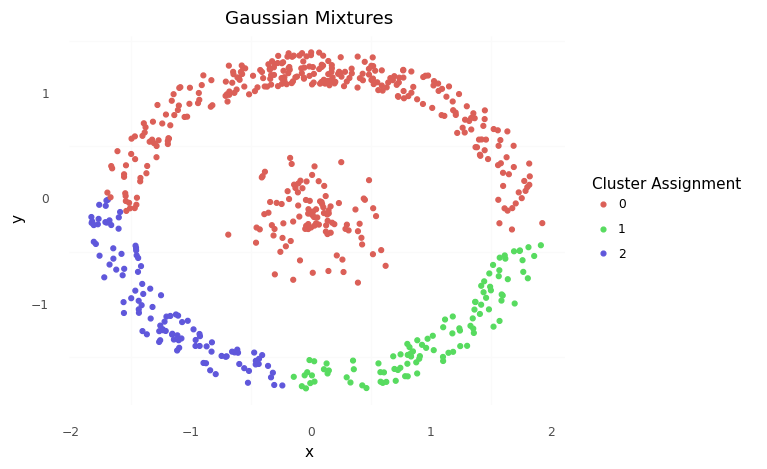

<ggplot: (8775624738189)>


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

# Dataset 5

In [ ]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")


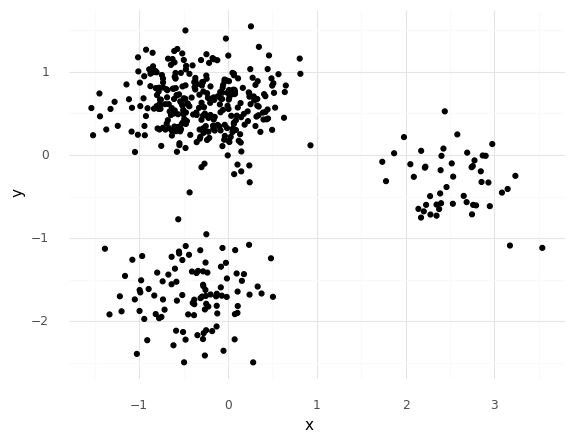

<ggplot: (8775626559669)>

In [ ]:
z = StandardScaler()
d5[["x","y"]] = z.fit_transform(d5)

ggplot(d5, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

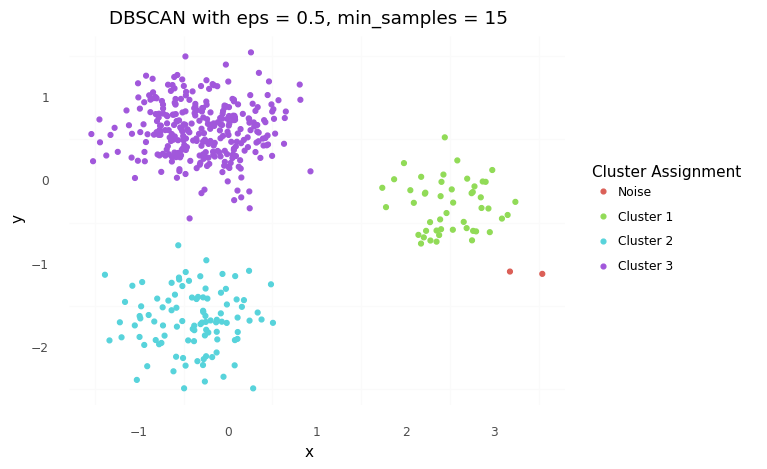

<ggplot: (8775626559653)>

In [ ]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)
labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

d5["assignments"] = db5.labels_

(ggplot(d5, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 15"))

In [ ]:
# grab only clustered data points
d5_clustered = d5.loc[(d5.assignments >= 0)]

print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))
# overall 
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.7048131054311416
0.6714107830551044


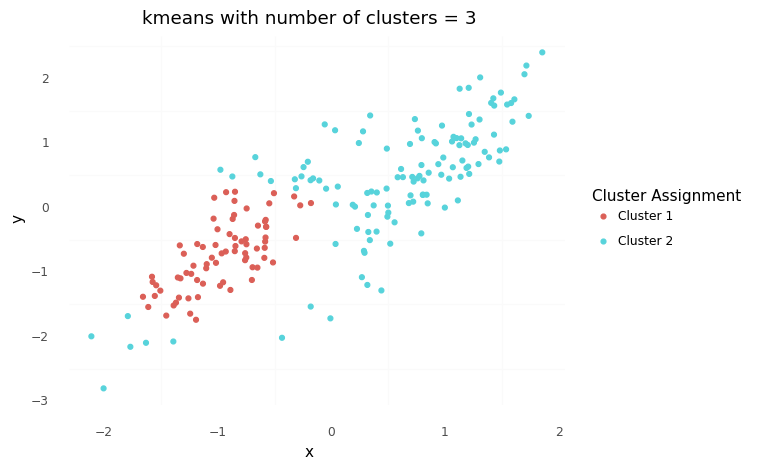

<ggplot: (8775631254609)>

In [ ]:
# Kmeans
k=3 
db5_kmeans=KMeans(n_clusters=k).fit(d5)
labsList = labsList =  ["Cluster " + str(i) for i in range(1,len(set(db1_kmeans.labels_))+1)]

d5["assignments"] = db5_kmeans.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 3"))

Text(0, 0.5, 'Distortion')

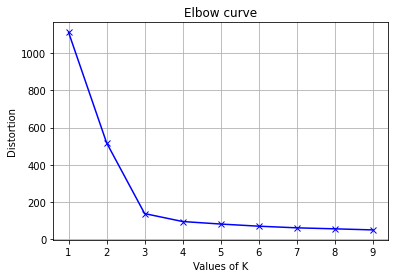

In [ ]:
# Elbow method
SSE = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d5)
    SSE.append(kmeans.inertia_)

fig = plt.figure()
plt.plot(range(1, 10), SSE,'bx-')
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Values of K')
plt.ylabel('Distortion')

In [ ]:
# Silhouette Score for kmeans

score=silhouette_score(d5[['x','y']], d5["assignments"])
print("Silhouetter Score for  Kmeans = ",score)

Silhouetter Score for  Kmeans =  0.7043537508086658


In [ ]:
# Hierarchical
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(d5)
score = silhouette_score(d5, clustering.labels_, metric='euclidean')
print("Hirerical clustering of ward " ,score)
print('#------------------------------------')
print("\n")

clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single').fit(d5)
score = silhouette_score(d5, clustering.labels_, metric='euclidean')
print("Hirerical clustering of single " ,score)
print('#------------------------------------')
print("\n\n")

clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(d5)
score = silhouette_score(d5 ,clustering.labels_, metric='euclidean')
print("Hirerical clustering of complete " ,score)
print('#------------------------------------')

Hirerical clustering of ward  0.6222106691924866
#------------------------------------


Hirerical clustering of single  0.62359447561707
#------------------------------------



Hirerical clustering of complete  0.62359447561707
#------------------------------------


In [ ]:
# GaussianMixture
gm = GaussianMixture(2).fit(d5)
d5["assignments"] = gm.predict(d5)

score = silhouette_score(d5[["x","y"]],d5["assignments"])
print(score )

0.5789368466530734


# Dataset 6

In [ ]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")


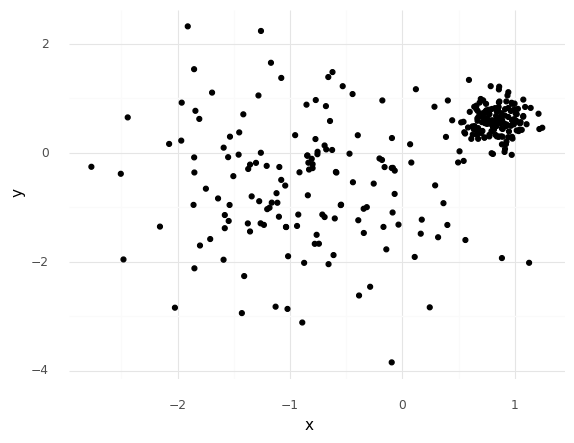

<ggplot: (8775624762213)>

In [ ]:
z = StandardScaler()
d6[["x","y"]] = z.fit_transform(d6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

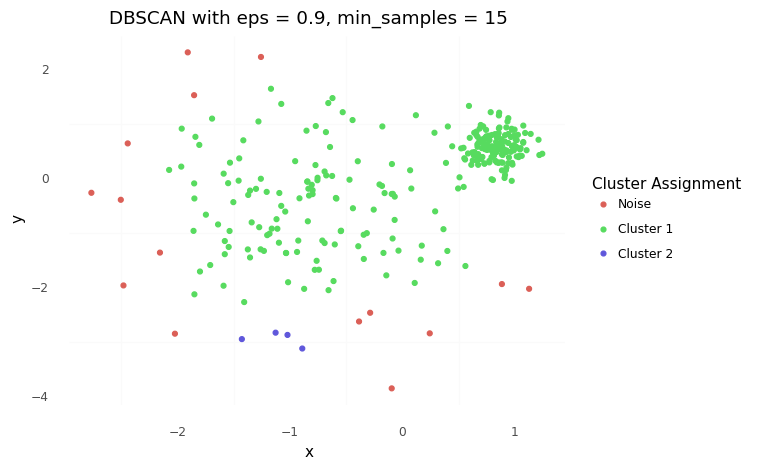

<ggplot: (8775631294493)>

In [ ]:
db6 = DBSCAN(eps = 0.45, min_samples = 3).fit(d6)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

d6["assignments"] = db6.labels_

(ggplot(d6, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.9, min_samples = 15"))

In [ ]:
# grab only clustered data points
d6_clustered = d6.loc[(d6.assignments >= 0)]

print(silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"]))

# overall 
print(silhouette_score(d6[["x","y"]], d6["assignments"]))

0.49007245503214775
0.396045290883704


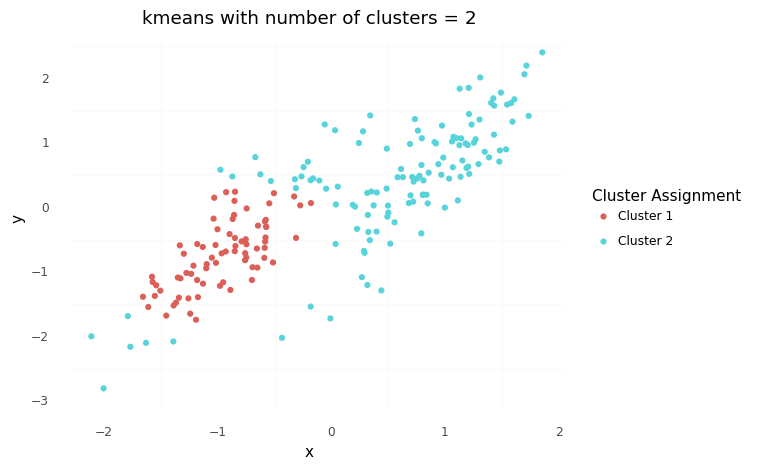

<ggplot: (8775624695533)>

In [ ]:
# Kmeans
k=2 
db6_kmeans=KMeans(n_clusters=k).fit(d6)
labsList = labsList =  ["Cluster " + str(i) for i in range(1,len(set(db1_kmeans.labels_))+1)]

d6["assignments"] = db6_kmeans.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 2"))

Text(0, 0.5, 'Distortion')

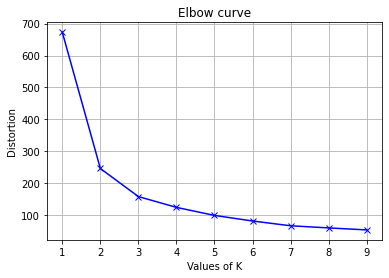

In [ ]:
# Elbow method
SSE = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d6)
    SSE.append(kmeans.inertia_)

fig = plt.figure()
plt.plot(range(1, 10), SSE,'bx-')
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Values of K')
plt.ylabel('Distortion')

In [ ]:
# Silhouette Score for kmeans

score=silhouette_score(d6[['x','y']], d6["assignments"])
print("Silhouetter Score for  Kmeans = ",score)

Silhouetter Score for  Kmeans =  0.5829742988895884


In [ ]:
# Hierarchical
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(d6)
score = silhouette_score(d6, clustering.labels_, metric='euclidean')
print("Hirerical clustering of ward " ,score)
print('#------------------------------------')
print("\n")

clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single').fit(d6)
score = silhouette_score(d6, clustering.labels_, metric='euclidean')
print("Hirerical clustering of single " ,score)
print('#------------------------------------')
print("\n\n")

clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(d6)
score = silhouette_score(d6 ,clustering.labels_, metric='euclidean')
print("Hirerical clustering of complete " ,score)
print('#------------------------------------')

Hirerical clustering of ward  0.6024695043847409
#------------------------------------


Hirerical clustering of single  0.5134302784107425
#------------------------------------



Hirerical clustering of complete  0.38553935024267927
#------------------------------------


In [ ]:
# GaussianMixture
gm = GaussianMixture(2).fit(d6)
d6["assignments"] = gm.predict(d6)

score = silhouette_score(d6[["x","y"]],d6["assignments"])
print(score )

0.5829742988895884
